In [4]:
import egtplot
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi

In [1]:
def get_payoff(x,y):

    xD = x
    xC = y
    xL = 1-x-y

    M = 200
    N = 50
    # 相对效用
    betaD = 1.5  # 1.不合理的地方：betaD是1.5倍，d确是l的8倍
    betaC = 1.1
    # 成本
    d = 4
    c = 1
    l = 0.5
    
    Pd = 0 #内卷群体   的累加净收益
    Pc = 0 #sit-up群体  的累加净收集
    Pl = 0 #躺平群体    的累加净收益
    
    
    for Nd in range(0,N-1):
        for Nc in range(0,N-1-Nd):
            Nl = N-1-Nd-Nc
            pai_d = betaD*d*M/(betaD*(Nd+1)*d +betaC*Nc*c     +Nl*l)-d
            pai_c = betaC*c*M/(betaD*Nd*d     +betaC*(Nc+1)*c +Nl*l)-c
            pai_l =       l*M/(betaD*Nd*d     +betaC*Nc*c     +(Nl+1)*l)-l

            Pd += comb(N - 1, Nd) * comb(N - 1 - Nd, Nl) * (xD ** Nd) * (xC ** Nc) * (
                        xL ** Nl) * pai_d
            Pc += comb(N - 1, Nd) * comb(N - 1 - Nd, Nl) * (xD ** Nd) * (xC ** Nc) * (
                        xL ** Nl) * pai_c
            Pl += comb(N - 1, Nd) * comb(N - 1 - Nd, Nl) * (xD ** Nd) * (xC ** Nc) * (
                        xL ** Nl) * pai_l

    R_ = xD * Pd + xC * Pc + xL * Pl  ##均值
    xD_ = xD * (Pd - R_)
    xC_ = xC * (Pc - R_)
    xL_ = xL * (Pl - R_)
    return [[Pd]*3,
             [Pc]*3,
             [Pl]*3]

1it [00:00,  3.30it/s]


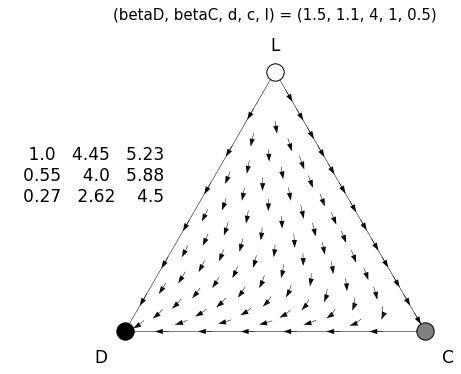

In [30]:
def helper(betaD,betaC,d,c,l):
    M=10
    return [[M/2-d,M*betaD*d/(betaC*c+betaD*d)-d,M*betaD*d/(l+betaD*d)-d],
           [M*betaC*c/(betaC*c+betaD*d)-c,M/2-c,M*betaC*c/(l+betaC*c)-c],
           [M*l/(l+betaD*d)-l,M*l/(l+betaC*c)-l,M/2-l]]
parameter_values = [[1.5], [1.1], [4], [1],[0.5]]
labels = ['D','C','L']
simplex = egtplot.plot_static(parameter_values, custom_func=helper, vert_labels=labels)